In [12]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Indian_Kids_Screen_Time.csv')

In [14]:
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [15]:
df.tail()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban
9711,15,Female,6.12,TV,True,0.33,Anxiety,Urban


In [ ]:
print(f"Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

Dataset shape: 9,712 rows × 8 columns


In [ ]:
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

Memory usage: 2305.49 KB


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [19]:

print("-" * 50)

missing_values = df.isnull().sum()

if missing_values.sum() == 0:
    print("✓ No missing values found")
else:
    print("Missing values found:")
    print(missing_values[missing_values > 0])


--------------------------------------------------
Missing values found:
Health_Impacts    3218
dtype: int64


In [20]:

print("-" * 40)
print(df.dtypes.value_counts())

----------------------------------------
object     4
float64    2
int64      1
bool       1
Name: count, dtype: int64


In [21]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 0:

    print("-" * 40)
    print(f"Found {len(numeric_cols)} numerical columns")
    print(df[numeric_cols].describe())


----------------------------------------
Found 3 numerical columns
               Age  Avg_Daily_Screen_Time_hr  \
count  9712.000000               9712.000000   
mean     12.979201                  4.352837   
std       3.162437                  1.718232   
min       8.000000                  0.000000   
25%      10.000000                  3.410000   
50%      13.000000                  4.440000   
75%      16.000000                  5.380000   
max      18.000000                 13.890000   

       Educational_to_Recreational_Ratio  
count                        9712.000000  
mean                            0.427226  
std                             0.073221  
min                             0.300000  
25%                             0.370000  
50%                             0.430000  
75%                             0.480000  
max                             0.600000  


In [22]:
categorical_cols = df.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:

    print("-" * 40)
    print(f"Found {len(categorical_cols)} categorical columns")
    for col in categorical_cols:
        unique_count = df[col].nunique()
        print(f"{col}: {unique_count} unique values")


----------------------------------------
Found 4 categorical columns
Gender: 2 unique values
Primary_Device: 4 unique values
Health_Impacts: 15 unique values
Urban_or_Rural: 2 unique values


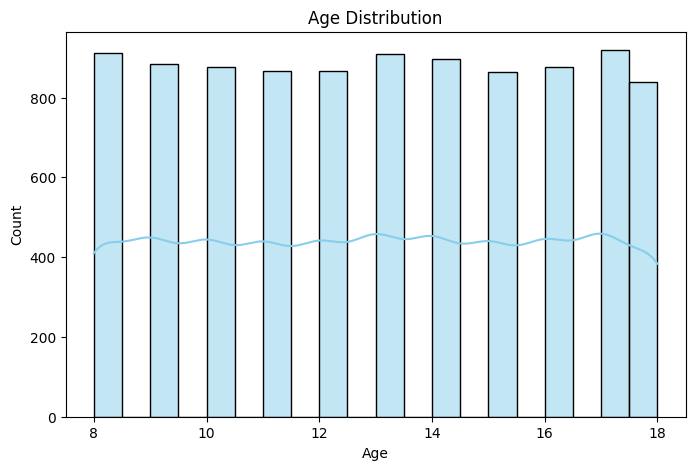

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



<Figure size 800x500 with 0 Axes>

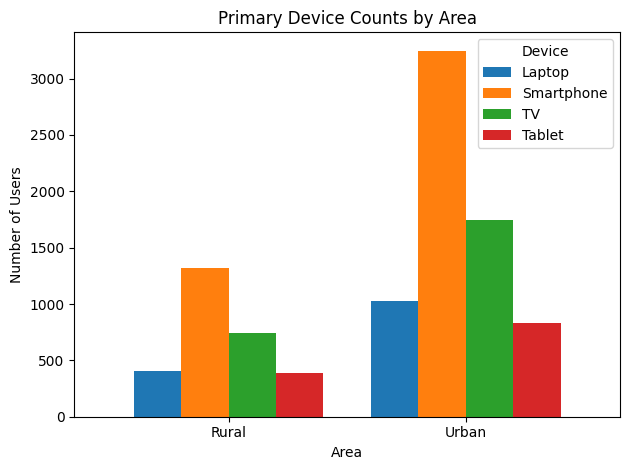

In [24]:

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Indian_Kids_Screen_Time.csv")

counts = df.groupby(["Urban_or_Rural","Primary_Device"]).size().unstack(fill_value=0)

plt.figure(figsize=(8,5))
counts.plot(kind="bar", width=0.8)
plt.title("Primary Device Counts by Area")
plt.xlabel("Area")
plt.ylabel("Number of Users")
plt.xticks(rotation=0)
plt.legend(title="Device")
plt.tight_layout()
plt.show()
